# **CS-331: Introduction to Artificial Intelligence - Spring 2024**

# Assignment 2: Logistic, Lasso, and Ridge Regression

### Deadline:  12 March 2024 11:55 PM

### Instructions

1. The aim of the assignment is to familiarise you with code implementation of concepts covered in class as well as learn thorough data analysis.

2. All cells must be run once before submission and should $\color{orange}{\text{clearly display the results (graphs/plots/visualizations etc)}}$. Failure to do so will result in deduction of points.

5. Use procedural programming style and comment your code properly. The grading breakdown has $\color{orange}{\text{five}}$ points reserved for well-commented, modular code. 

### Submission Instructions

1. You are required to upload your solutions on LMS in the Assignment tab by the deadline. 

2. The zip file MUST contain your jupyter notebook file (.ipynb) and python script (.py) files.

3. **EACH** file should be named as "Name_RollNumber_PA $\color{orange}{\text{x}}$" where $\color{orange}{\text{x = 2}}$ for this assignment. 

### Late Submission Policy

1. You can submit upto 2 days late with a 10% deduction penalty (from your final obtained marks) for each late day.
2. $\color{red}{\text{No submission}}$ will be accepted after the late days are over.
2. $\color{red}{\text{No submission}}$ will be accepted via email/Slack, unless announced by the course staff beforehand. It is your responsibility to stay updated with any announcements pertaining to the assignment. 

### Plagiarism Policy
All parts of this assignment are to be done $\color{red}{\text{INDEPENDENTLY}}$. The course stuff will refer any case of plagiarism 
from others or the internet immediately to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the TAs
in a timely manner.

### Vivas

The teaching staff reserves the right to conduct a viva for any student.  

### Notes
The required packages for this assignment are already present in the first cell.

If you are running the noteook on your PC/laptop, it is STRONGLY advised that you install [conda](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) and work in a conda environment for this and future assignments. This will go a long way in ensuring you do not get dependency conflicts and your system does not slow down (believe me conflics actually happen and have cost me my sanity).

### Conda Instructions

After installing [conda](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html), open a terminal/command prompt window in the assignment folder and run `conda env create -f environment.yml` command to automatically create an isolated conda environment titled `AI_env` with required packages installed. Then open/restart VSCode to select this environment as the kernel for your notebook. Your first cell should now compile smoothly! 

P.S: You can also check the output of the command `conda list -n AI_env` to see if each required package listed in the `environment.yml` file is present in this environment.

If you are working on Google Colab, you do not need this. In case the `root_mean_squared` function throws an import error, just use the mean squared error with the argument `squared` set to `False`.


In [2]:
# Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, mean_squared_error # set 'squared' argument to false to get RMSE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso

## Task 1A: Multinomial Logistic Regression

### Problem Introduction

This task is intended to give you a solid understanding of logistic regression.

Logistic regression is primarily employed for classification problems. 

**Binary (or simple) logistic regression** deals with scenarios where the dependent variable has two possible outcomes e.g. yes/no, true/false etc. It models the probability of an observation belonging to one of the two categories.

**Multinomial logistic regression** extends binary logistic regression to handle situations with more than two categories (yes/no/maybe) for the dependent variable. It's useful for classification problems involving multiple classes. In this part, you will be implementing a model that can handle classification in one such multiclass case.

### Dataset
The dataset for this task is provided in a csv titled `star_classification.csv`. It consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. Following is the description of each column in the dataset.

**obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS  

**alpha** = Right Ascension angle (at J2000 epoch)  

**delta** = Declination angle (at J2000 epoch)  

**u** = Ultraviolet filter in the photometric system  

**g** = Green filter in the photometric system  

**r** = Red filter in the photometric system  

**i** = Near Infrared filter in the photometric system  

**z** = Infrared filter in the photometric system  

**run_ID** = Run Number used to identify the specific scan  

**rereun_ID** = Rerun Number to specify how the image was processed  

**cam_col** = Camera column to identify the scanline within the run  

**field_ID** = Field number to identify each field  

**spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)  

**class** = Object class (galaxy, star, or quasar object) $\color{green}{\text{-> This column has the labels that your classifier will predict}}$

**redshift** = Redshift value based on the increase in wavelength  

**plate** = Plate ID, identifies each plate in SDSS  

**MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken  

**fiber_ID** = Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation 

### Task

Your objective will be to build a classifier that can classify the `class` as either `star`, `galaxy` or `quasar` for instances in the test set.

### Note

You are $\color{red}{\text{NOT}}$ allowed to use `scikit-learn` for any part of this task. 

1. To start off, load the csv as a pandas `DataFrame`, visualize it and report its shape.

Shape of DataFrame: (100000, 18)

Preview of DataFrame:
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAX

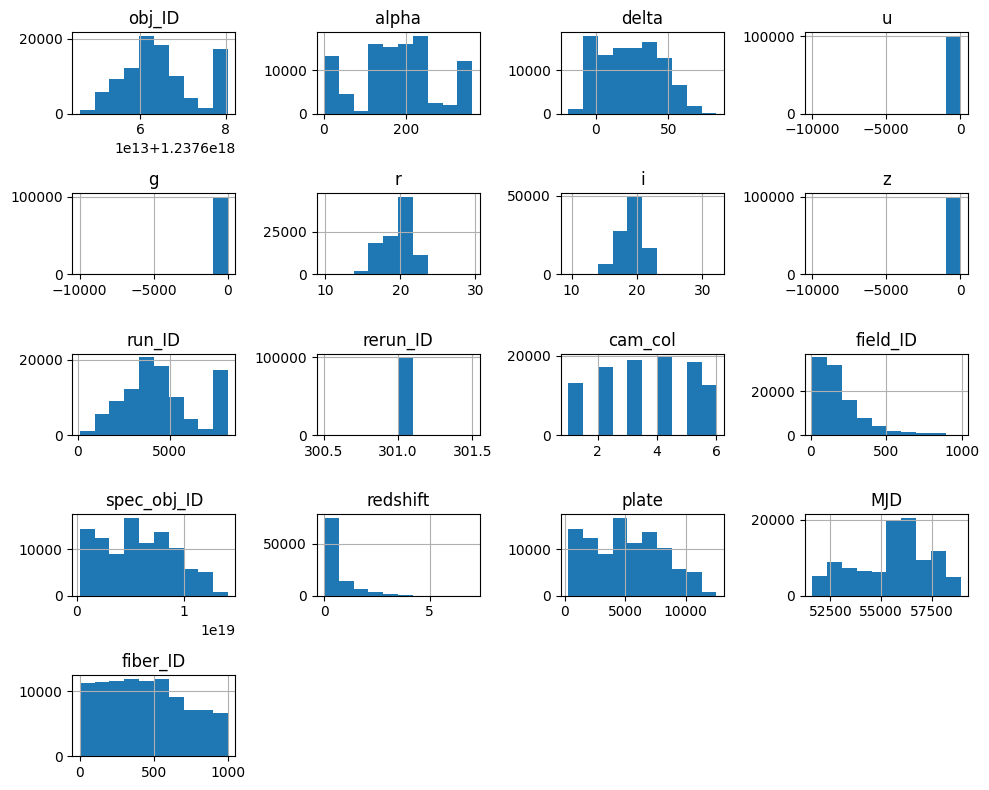

Shape of the DataFrame: (100000, 18)


In [2]:
 ## YOUR CODE HERE ##
df = pd.read_csv('star_classification.csv')
print("Shape of DataFrame:", df.shape)
print("\nPreview of DataFrame:")
print(df.head())

# Visualize using matplotlib (assuming columns are numerical)
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

print("Shape of the DataFrame:", df.shape)

2. Now split the dataset into train and test sets. Choose the split ratio based on your intuition and knowledge. 

In [3]:
 ## YOUR CODE HERE ##
split_index = int(len(df) * 0.7)

ratio_70 = df[:split_index]

ratio_30 = df[split_index:]

Now that you have loaded the data and understood its structure, you will do some preprocessing to get features and class labels/categories for use with your classifier:

1. Make new DataFrames labelled `X_train` and `X_test` that have the feature columns only. Remove any features that you consider irrelevant for training the classifier. You could use trial and error to observe which set of attributes give you the best accuracy. (HINT: Check the dataset description given earlier to decide which columns might be dropped). 

2. Normalize both train and test feature matrices. (Caveat: make sure to normalize test set appropriately). 

3. Report normalized `X_train` and `X_test` shape and state what each dimension of shape represents. 

4. Incorporate a bias vector of appropriate shape (determine this yourself) to the normalized feature matrices.

5. Report first instance of normalized train and test feature matrices before and after adding the bias vector.

In [15]:
 ## YOUR CODE HERE ##
X_train = ratio_70.drop(columns=['plate', 'class', 'MJD', 'fiber_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'obj_ID', 'run_ID'])
X_test = ratio_30.drop(columns=['plate', 'class', 'MJD', 'fiber_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'obj_ID', 'run_ID'])
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

X_train_normalized = (X_train - X_train_mean) / X_train_std
X_test_normalized = (X_test - X_train_mean) / X_train_std  # Using mean and std of training data for normalization

# Determine the shape of the bias vector
bias_shape = (X_train_normalized.shape[0], 1)

# Create the bias vector for train and test sets
bias_train = np.ones(bias_shape)
bias_test = np.ones((X_test_normalized.shape[0], 1))

# Add bias vector to normalized feature matrices
X_train_normalized_with_bias = np.concatenate((bias_train, X_train_normalized), axis=1)
X_test_normalized_with_bias = np.concatenate((bias_test, X_test_normalized), axis=1)

# Report first instance of normalized train and test feature matrices before and after adding the bias vector
print("First instance of normalized train feature matrix before adding bias vector:")
print(X_train_normalized.iloc[0])

print("\nFirst instance of normalized test feature matrix before adding bias vector:")
print(X_test_normalized.iloc[0])

print("\nFirst instance of normalized train feature matrix after adding bias vector:")
print(X_train_normalized_with_bias[0])

print("\nFirst instance of normalized test feature matrix after adding bias vector:")
print(X_test_normalized_with_bias[0])


Shape of X_train: (70000, 8)
Shape of X_test: (30000, 8)
First instance of normalized train feature matrix before adding bias vector:
alpha      -0.438649
delta       0.453442
u           0.795630
g           0.808750
r           0.405982
i           0.046484
z           0.013719
redshift    0.084885
Name: 0, dtype: float64

First instance of normalized test feature matrix before adding bias vector:
alpha       0.172058
delta       1.478349
u          -0.402480
g           0.143167
r           0.473799
i           0.697219
z           0.872870
redshift   -0.119649
Name: 70000, dtype: float64

First instance of normalized train feature matrix after adding bias vector:
[ 1.         -0.43864887  0.45344159  0.79562991  0.80874965  0.40598172
  0.04648355  0.0137188   0.08488466]

First instance of normalized test feature matrix after adding bias vector:
[ 1.          0.1720584   1.47834852 -0.40248036  0.14316696  0.47379918
  0.69721897  0.87287038 -0.11964885]


6. Extract the class labels from both train and test dataset, and convert to NumPy array for faster preprocessing. Label these `y_train` and `y_test`. (HINT: Check dataset description to see which column to extract).

7. Report `y_train` and `y_test` shape and state what each dimension of shape represents.

In [16]:
 ## YOUR CODE HERE ##
y = df['class']

Y_train = y[:split_index]
Y_test = y[split_index:]

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)


Shape of y_train: (70000,)
Shape of y_test: (30000,)


As you would have seen, `y_train` and `y_test` have class labels/categories in string format right now. However, many machine learning algorithms, such as logistic regression, support only numerical input features. They are designed to perform mathematical operations on numerical data, such as addition, subtraction, and multiplication. Therefore, we will first encode these string labels as integers, and then one-hot encode them.

7. Create a mapping that converts the current class labels to integers e.g. Class1: 0, Class2: 1 etc

8. Use the mapping to create updated `y_train` and `y_test`. 

In [17]:
label_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}

# Encode class labels as integers using the mapping
y_train_encoded = np.array([label_mapping[label] for label in Y_train])
y_test_encoded = np.array([label_mapping[label] for label in Y_test])

# Report shapes of y_train_encoded and y_test_encoded
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of y_train_encoded: (70000,)
Shape of y_test_encoded: (30000,)


Currently, our updated `y_train` and `y_test` are represented by integers. However, using this ordinal encoding (assigning integers to categories) may introduce an inherent order or magnitude between categories that does not exist in the original data. 

One-hot encoding avoids this issue by representing each category as a separate binary variable, thereby treating them as equally important and removing any ordinal bias. In logistic regression, when dealing with multiple classes, one-hot encoding enables the model to predict probabilities for each class independently. Each class is represented by its own binary variable, and the model learns separate coefficients for each class, allowing it to make predictions across multiple classes.

Example:  If `y_train = [0,0,1,2]` then one-hot encoded representation of this vector would be: `[[1,0,0], [1,0,0], [0,1,0], [0,0,1]]`

9. Write a function to one-hot encode the labels.

10. Call the function to get one-hot encoded labels for both train and test sets.

In [18]:
 ## YOUR CODE HERE ##
def one_hot_encode(labels, num_classes):
    n_samples = len(labels)
    one_hot_encoded_labels = np.zeros((n_samples, num_classes))
    for i, label in enumerate(labels):
        one_hot_encoded_labels[i, label] = 1
    return one_hot_encoded_labels

# Example usage:
# Assuming label_mapping and y_train_encoded are defined from previous steps
num_classes = len(set(y_train_encoded))  # Get the number of unique classes
y_train_one_hot = one_hot_encode(y_train_encoded, num_classes)
y_test_one_hot = one_hot_encode(y_test_encoded, num_classes)

# Report shapes of y_train_one_hot and y_test_one_hot
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

Shape of y_train_one_hot: (70000, 3)
Shape of y_test_one_hot: (30000, 3)


Report first 10 instances of:

1. Your original `y_train` and `y_test` arrays.
2. Your integer-encoded `y_train` and `y_test` arrays. 
3. Your one-hot encoded `y_train` and `y_test` arrays. 

(Note how reporting this can help you understand your arrays properly and verify that they are correctly structured too)

In [19]:
 ## YOUR CODE HERE ##
n_instances = 10

# Report original y_train and y_test arrays
print("Original y_train (first 10 instances):")
print(Y_train[:n_instances])

print("\nOriginal y_test (first 10 instances):")
print(Y_test[:n_instances])

# Report integer-encoded y_train and y_test arrays
print("\nInteger-encoded y_train (first 10 instances):")
print(y_train_encoded[:n_instances])

print("\nInteger-encoded y_test (first 10 instances):")
print(y_test_encoded[:n_instances])

# Report one-hot encoded y_train and y_test arrays
print("\nOne-hot encoded y_train (first 10 instances):")
print(y_train_one_hot[:n_instances])

print("\nOne-hot encoded y_test (first 10 instances):")
print(y_test_one_hot[:n_instances])

Original y_train (first 10 instances):
['GALAXY' 'GALAXY' 'GALAXY' 'GALAXY' 'GALAXY' 'QSO' 'QSO' 'GALAXY'
 'GALAXY' 'STAR']

Original y_test (first 10 instances):
['GALAXY' 'QSO' 'STAR' 'GALAXY' 'GALAXY' 'GALAXY' 'GALAXY' 'GALAXY'
 'GALAXY' 'GALAXY']

Integer-encoded y_train (first 10 instances):
[0 0 0 0 0 1 1 0 0 2]

Integer-encoded y_test (first 10 instances):
[0 1 2 0 0 0 0 0 0 0]

One-hot encoded y_train (first 10 instances):
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

One-hot encoded y_test (first 10 instances):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


You are now ready to use the above matrices/arrays to implement your classifier and evaluate it on the test set. 
Please feel free to create as many cells as you need for modularity. 

Remember there are 5 points for well-commented/structured code. 

### Implement the following:

 * Softmax function
 * Cross-entropy loss function
 * Batch Gradient Descent function
 * Prediction function that predicts output class using learned logistic regression (choose the highest probability class)
 * Evaluation function that calculates classification accuracy on test set 
 * Report plots with no. of iterations/epochs on x-axis and training/validation loss on y-axis.

Accuracy on test set: 0.8625142857142857


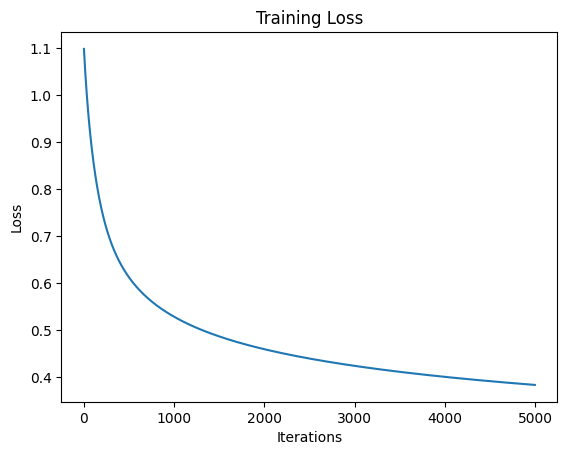

In [37]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y, y_pred):
    m = y.shape[0]
    return -1/m * np.sum(y * np.log(y_pred))

def batch_gradient_descent(X, y, learning_rate, num_iterations, loss_list):
    m, n = X.shape
    theta = np.zeros((n, y.shape[1]))

    for i in range(num_iterations):
        z = np.dot(X, theta)
        y_pred = softmax(z)
        loss = cross_entropy_loss(y, y_pred)
        loss_list.append(loss)

        gradient = -1/m * np.dot(X.T, (y - y_pred))
        theta -= learning_rate * gradient
    return theta

def predict(X, theta):
    z = np.dot(X, theta)
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)

def evaluate(X, y, theta):
    y_pred = predict(X, theta)
    accuracy = np.mean(y_pred == y)
    return accuracy

def plot_losses(loss_list):
    plt.plot(range(len(loss_list)), loss_list)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# Example usage
learning_rate = 0.01
num_iterations = 5000

loss = []

# Perform batch gradient descent
weights = batch_gradient_descent(X_train_normalized_with_bias, y_train_one_hot, learning_rate, num_iterations, loss)

# Predict on test set
y_pred = evaluate(X_train_normalized_with_bias, y_train_encoded, weights)

# Evaluate accuracy
print("Accuracy on test set:", y_pred)

plot_losses(loss)

## Task 1B: Reflection Questions

#### 1. How did normalization help in our case? Why did we need it? 

$\color{green}{\text{Answer:}}$ Normalisation helps make sure that each feature has a similar scale, leading to it converging more quickly and effeciently. Furthermore, it keeps one feature from dominating over other features due to lare value of weights.
#### 2. What function instead of Softmax would we have used if this was a binary classification problem? How does softmax differ from it? 

$\color{green}{\text{Answer:}}$ In the case of binary classification we would have used the "Sigmoid" Function. Softmax differs from sigmoid in regards to the fact that Sigmoid accounts for only two classes "0" and "1", while Softmax gives a general probability to values spread across multiple classes.

## Task 2: Regularization - Ridge Regression

### Problem Introduction

This task is intended to familiarise you with regularization in the context of linear regression **(recall that you have implemented Linear Regression in PA1, it will be needed again here)**.

While training regression models, it is useful to ensure that there are some constraints on the weights learnt. These constraints are usually defined by some kind of penalty function included in the overall loss function. Generally, penalizing the norm of our weights means that during the training process, our model will prefer smaller values of weights.

We shall look at two types of regularization techniques. The first is Ridge Regression:
\begin{equation*}
\mathcal{L} = \frac{1}{N}(y - X\mathbf{w})^{2} + \lambda (\mathbf{w})^{2}
\end{equation*}

The second is Lasso Regression:
\begin{equation*}
\mathcal{L} = \frac{1}{N}(y - X\mathbf{w})^{2} + \lambda |\mathbf{w}|
\end{equation*}

The L2 penalty on the weights penalizes larger values more than smaller ones while the L1 penalty penalizes all kinds of weights equally. The L1 penalty is also used to promote sparsity in the learnt weights (i.e. make certain weights which do not have a strong correlation with the data).

Please also note, for regularization to function properly, input **data must be normalized** to have zero mean and unit variance. We will be using StandardScaler() for it.

### Dataset

The dataset for this part is provided in a csv titled `auto_mpg.csv`. 

### Task

Your task is to implement a linear regression model to predict car `displacement` using the feature `mpg`. You will test different values of regularization parameter (`lambd`) to see which value gives the lowest training and testing loss.

1. To begin, load the `auto_mpg_dataset.csv` dataset into a pandas DataFrame, visualize it and report its shape.

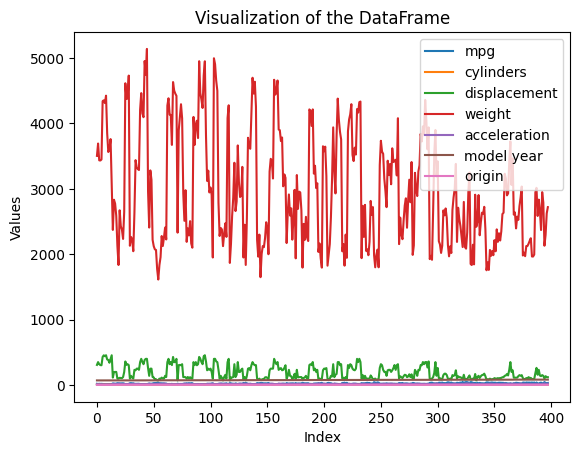

Shape of the DataFrame: (398, 9)


In [2]:
## YOUR CODE HERE ##
df = pd.read_csv('auto_mpg.csv')
df.plot()
plt.title("Visualization of the DataFrame")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

print("Shape of the DataFrame:", df.shape)

2. Extract the columns `mpg` and `displacement` and normalize these features by using a builtin function `StandardScaler()`. (You may need to clean the data for Null/NAN values before normalizing).

In [3]:
df.dropna(subset=['mpg', 'displacement'], inplace=True)

features = df[['mpg', 'displacement']]

features.dropna(inplace=True)

scaler = StandardScaler()

normalized_features = scaler.fit_transform(features)

normalized_df = pd.DataFrame(normalized_features, columns=['mpg_normalized', 'displacement_normalized'])

print(normalized_df)

     mpg_normalized  displacement_normalized
0         -0.706439                 1.090604
1         -1.090751                 1.503514
2         -0.706439                 1.196232
3         -0.962647                 1.061796
4         -0.834543                 1.042591
..              ...                      ...
393        0.446497                -0.513026
394        2.624265                -0.925936
395        1.087017                -0.561039
396        0.574601                -0.705077
397        0.958913                -0.714680

[398 rows x 2 columns]


C:\Users\razah\AppData\Local\Temp\ipykernel_20176\2756888993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


3. Split your data into train and test sets. You may make use of the `train_test_split` function from the scikit-learn library for this. The documentation for this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split). Make sure that you use a 80-20 split meaning 80% should be the training set and 20% should be for the test set.

In [22]:
## YOUR CODE HERE ##
from sklearn.model_selection import train_test_split
X = normalized_df['mpg_normalized']
y = normalized_df['displacement_normalized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = X_train.reshape(318, 1)
y_train = y_train.reshape(318, 1)
X_test = X_test.reshape(80, 1)
y_test =y_test.reshape(80, 1)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (318, 1) (318, 1)
Test set shape: (80, 1) (80, 1)


You shall now use gradient descent and analytical solution to fit model parameters. To do so, you must complete the `LinearRegression` class provided. This class should work for Ridge Regression (HINT : Gradient Calculations are different). 

Furthermore, it should be able to compute solutions `analytically` (also provided in sir's notes) as below

\begin{equation*}
(X^T X)^{-1} \cdot (X^T Y)
\end{equation*} 

as well as via gradient descent. 

A function to generate the feature matrix for a specified polynomial degree has been provided.

In [61]:
class LinearRegression:
    """
    A class to perform linear regression

    Methods:
        __init__(self, lambd, degree)                                                  : Initializes the LinearRegression instance.
        _normalize_input(self, x)                                                      :
        _generate_X(self, x)                                                           : Generate the matrix X containing samples of data upto the degree specified.
                                                                                         Bias term is included (i.e. first column is all ones).
        analytical_solution(self, x, y)                                                : Find the analytical solution for model weights which minimizes mean square error
        gradient_descent_solution(self, x, y, learning_rate, num_iterations, tol=1e-4) : Find a gradient descent based solution for model weights which minimizes mean square error.
    """
    def __init__(self, lambd, degree):

        self.lambd = lambd
        self.degree = degree

    def _normalize_input(self, x):
        x = (x - x.mean(axis = 0))/(x.std(axis = 0))
        return x

    def _generate_X(self, x):
        """
        Generate the matrix X containing samples of data upto the degree specified.
        Bias term is included (i.e. first column is all ones).

        Args:
            x (numpy.ndarray) : Input data of shape (num_points, 1)

        Returns:
            X (numpy.ndarray) : Matrix of shape (num_points, degree+1)
        """
        polynomial_features = PolynomialFeatures(degree=self.degree)
        X = polynomial_features.fit_transform(x)
        return X

    def analytical_solution(self, x, y): 
        """
        Find the analytical solution for model weights which minimizes mean square error

        Args:
            x (numpy.ndarray) : x values of data
            y (numpy.ndarray) : y values of data

        Returns:
            w                 : list of optimal weights for regression
        """
        X = self._generate_X(x)
        w = np.linalg.inv(X.T.dot(X) + self.lambd * np.identity(X.shape[1])).dot(X.T).dot(y)
        return w
    def gradient_descent_solution(self, x, y, learning_rate, num_iterations, tol=1e-4):
        """
        Find a gradient descent based solution for model weights which minimizes mean square error.

        Args:
            x (numpy.ndarray)    : x values of data
            y (numpy.ndarray)    : y values of data
            learning_rate (float): Learning rate for each gradient descent step
            num_iterations (int) : Number of iterations to perform before returning
            tol (float)          : value of epsilon s.t. when ||grad(f(x))||_{2} < epsilon, the algorithm terminates

        Returns:
        w               : list of optimal weights for regression
        """
        X = self._generate_X(x)
        w = np.random.randn(X.shape[1], self.degree + 1) # Initialize weights to zeros

        for _ in range(num_iterations):
            # Compute gradient of the objective function
            grad = (-2 * X.T.dot(y - X.dot(w)) / len(y)) + 2 * self.lambd * w
            # Update weights
            w -= learning_rate * grad
            # Check convergence
            if np.linalg.norm(grad) < tol:
                break
        return w

5. Use the LinearRegression class you have implemented above to compute weights using analytical and gradient descent solutions for each value of lambd. Using these computed weights, predict the displacement (this will be Y_predicted). Also plot the curves showing training and testing RMSE`(Y - Y_predicted)^2` for each value of `lambd`. We'll be taking a polynomial of `degree 3 with 100 values of lambda ranging from 0 to 10`.

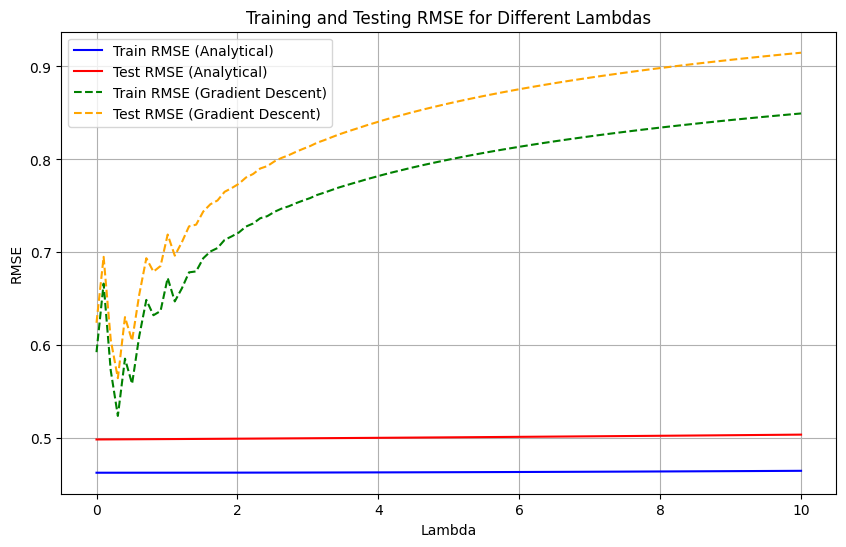

In [63]:
lambdas = np.linspace(0, 10, 100)

# Initialize lists to store RMSE values
train_rmse_analytical = []
test_rmse_analytical = []
train_rmse_gradient = []
test_rmse_gradient = []

# Perform regression for each lambda value
for lambd in lambdas:
    # Initialize and fit models
    lr_analytical = LinearRegression(lambd, degree=3)
    w_analytical = lr_analytical.analytical_solution(X_train, y_train)
    w_gradient = lr_analytical.gradient_descent_solution(X_train, y_train, learning_rate=0.001, num_iterations=1000)
    
    # Compute predictions
    y_train_pred_analytical = lr_analytical._generate_X(X_train).dot(w_analytical)
    y_test_pred_analytical = lr_analytical._generate_X(X_test).dot(w_analytical)
    y_train_pred_gradient = lr_analytical._generate_X(X_train).dot(w_gradient)
    y_test_pred_gradient = lr_analytical._generate_X(X_test).dot(w_gradient)
    
    # Compute RMSE
    train_rmse_analytical.append(np.sqrt(np.mean((y_train - y_train_pred_analytical)**2)))
    test_rmse_analytical.append(np.sqrt(np.mean((y_test - y_test_pred_analytical)**2)))
    train_rmse_gradient.append(np.sqrt(np.mean((y_train - y_train_pred_gradient)**2)))
    test_rmse_gradient.append(np.sqrt(np.mean((y_test - y_test_pred_gradient)**2)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_rmse_analytical, label='Train RMSE (Analytical)', color='blue')
plt.plot(lambdas, test_rmse_analytical, label='Test RMSE (Analytical)', color='red')
plt.plot(lambdas, train_rmse_gradient, label='Train RMSE (Gradient Descent)', linestyle='--', color='green')
plt.plot(lambdas, test_rmse_gradient, label='Test RMSE (Gradient Descent)', linestyle='--', color='orange')
plt.title('Training and Testing RMSE for Different Lambdas')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

6. Plot the output of the model with the least validation RMSE overlaid on top of the original data (mpg vs displacement).

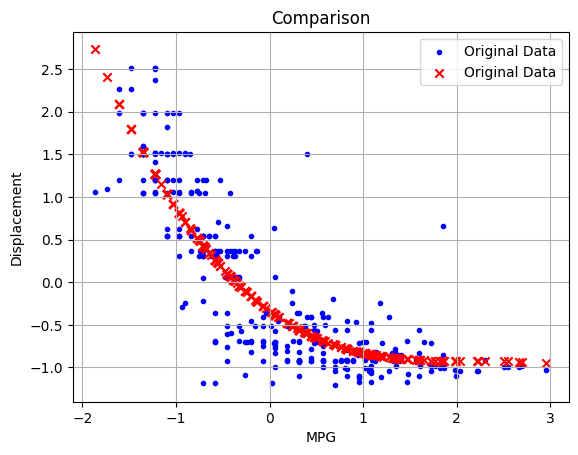

In [64]:
## YOUR CODE HERE ##

plt.scatter(X_train, y_train, marker = '.', label='Original Data', color='blue')
plt.scatter(X_train, y_train_pred_analytical, marker = 'x', label='Original Data', color='red')
plt.title('Comparison')
plt.xlabel('MPG')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)
plt.show()

6. What do you notice about the effect of varying $\lambda$ on dataset (the effect on the training/testing loss)?       
$\color{green}{\text{Answer:}}$ Increasing Lambda has an overall decreasing effect on the RMSE to a certain threshold, howerver, after crossing this threshold, it begins to increase the value of RMSE with increasing values of Lambda.


7. If you were to vary `learning rate` on dataset, what effect do you think if would have on the training/testing loss?                                                               
$\color{green}{\text{Answer:}}$ Learning rate refers to the size of the steps taken to convergence. If the learning rate is too high, it can overshoot the convergence point and resulting in a higher final loss and divergence. If it is set too low, the model may fail to reach the minimum, or the convergence point, so it would lead to an innacurate final loss. To find the true convergence point more iterations would be needed.

## Task 3: Regularization - Lasso Regression (with sci-kit learn)

Now we'll be using the scikit-learn library to perform Lasso regression using different values of alpha to learn the relationship between $y$: fuel average / mpg of different cars and $\mathbf{x}$: displacement in the `auto_mpg` dataset. You may create your own version of the `generate_X` function from the class implemented above to experiment with models that are non-linear _in features_. Also, do not forget to normalize your input data. A good way to implement all of these in one go is to make a scikit-learn [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Alpha values list is given.

1. Print the coefficients learnt by Lasso model for each value of alpha given. Is there anything particular about the change in coefficients learnt by Lasso regression with different values of alpha?


In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Load dataset
auto_df = pd.read_csv("auto_mpg.csv")

# Drop rows with missing values
auto_df = auto_df.dropna()

# Extract the features and target
X = auto_df[['displacement']]
y = auto_df['mpg']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def generate_X(X):
    # You can modify this function to generate non-linear features if needed
    polynomial_features = PolynomialFeatures(degree=3)
    X = polynomial_features.fit_transform(X)
    return X

# Define alphas
alphas = [10 ,1, 0.1, 0.01, 0.001, 0.0001]

# Define pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature normalization
    ('lasso', Lasso())  # Lasso regression
])

# Iterate over alphas
for alpha in alphas:
    print(f"\nLasso Regression with alpha={alpha}:")
    lasso_pipeline.set_params(lasso__alpha=alpha)  # Set alpha parameter for Lasso
    lasso_pipeline.fit(generate_X(X_train), y_train)
    print("Coefficients:", lasso_pipeline.named_steps['lasso'].coef_)



Lasso Regression with alpha=10:
Coefficients: [ 0. -0. -0. -0.]

Lasso Regression with alpha=1:
Coefficients: [ 0.         -5.34669362 -0.         -0.        ]

Lasso Regression with alpha=0.1:
Coefficients: [ 0.         -8.78884509  0.          2.72682913]

Lasso Regression with alpha=0.01:
Coefficients: [  0.         -11.49668615   2.83728635   2.54919652]

Lasso Regression with alpha=0.001:
Coefficients: [  0.         -14.69400341   9.17642298  -0.69794739]

Lasso Regression with alpha=0.0001:
Coefficients: [  0.         -15.22339345  10.2826215   -1.29402897]


c:\Users\razah\miniconda3\envs\AI_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\razah\miniconda3\envs\AI_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.905e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(


2. We will be using the coefficents (computed above) and see which of them provide us with minimum RMSE (same as we computed for ridge regression). Plot the output of the model (Lasso) with the least validation RMSE overlaid on top of the original data. Do not forget to report both training and testing RMSE plots for the values of alpha.

c:\Users\razah\miniconda3\envs\AI_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\razah\miniconda3\envs\AI_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.905e+03, tolerance: 1.994e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\razah\miniconda3\envs\AI_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

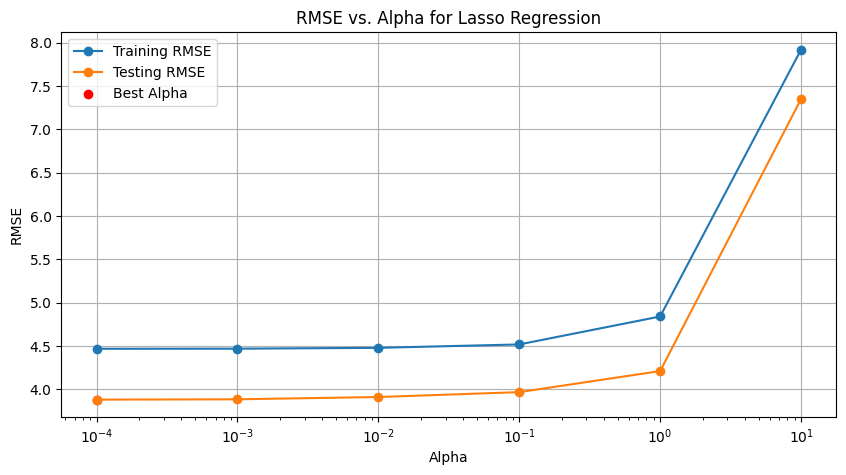

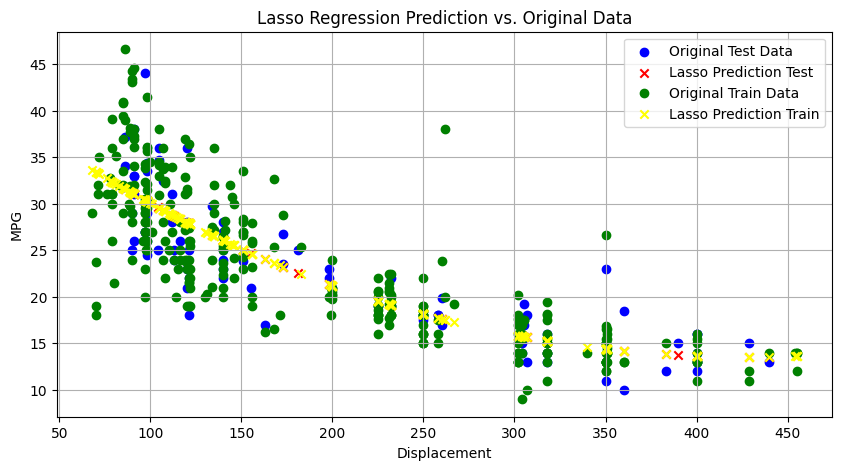

In [26]:
## YOUR CODE HERE ##
train_rmse = []
test_rmse = []

# Iterate over alphas
for alpha in alphas:
    lasso_pipeline.set_params(lasso__alpha=alpha)  # Set alpha parameter for Lasso
    lasso_pipeline.fit(generate_X(X_train), y_train)
    
    # Predictions on training and testing set
    y_train_pred = lasso_pipeline.predict(generate_X(X_train))
    y_test_pred = lasso_pipeline.predict(generate_X(X_test))
    
    # Compute RMSE for training and testing set
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Find index of alpha with minimum test RMSE
min_rmse_idx = np.argmin(test_rmse)
best_alpha = alphas[min_rmse_idx]
lasso_pipeline.set_params(lasso__alpha=best_alpha)
lasso_pipeline.fit(generate_X(X_train), y_train)

y_test_pred_best_alpha = lasso_pipeline.predict(generate_X(X_test))
y_train_pred_best_alpha = lasso_pipeline.predict(generate_X(X_train))

plt.figure(figsize=(10, 5))
plt.plot(alphas, train_rmse, label='Training RMSE', marker='o')
plt.plot(alphas, test_rmse, label='Testing RMSE', marker='o')
plt.scatter(best_alpha, test_rmse[min_rmse_idx], color='red', label='Best Alpha')
plt.title('RMSE vs. Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Plot original data with best Lasso model overlay
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Original Test Data')
plt.scatter(X_test, y_test_pred_best_alpha, color='red', marker = 'x', label='Lasso Prediction Test')
plt.scatter(X_train, y_train, color='green', label='Original Train Data')
plt.scatter(X_train, y_train_pred_best_alpha, color='yellow', marker = 'x', label='Lasso Prediction Train')
plt.title('Lasso Regression Prediction vs. Original Data')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()
print("Coefficients:", lasso_pipeline.named_steps['lasso'].coef_)


# **THE END :)**